In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('data\HousePrice_processed.csv')
df.head()

,Index,Title,Description,Carpet Area,Status,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,Super Area,BHK,Current Floor,Total Floors,Amount,Price,Location,Facing
0,0,Ready to Occupy Flat for sale in Srushti Siddh...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",500.0,Ready to Move,Resale,Unfurnished,1,2,0,Unknown,NaN,1,10,11,4200000.0,6000.0,thane,Unknown
1,1,Ready to Occupy Flat for sale in Dosti Vihar P...,One can find this stunning 2 BHK flat for sale...,473.0,Ready to Move,Resale,Semi-Furnished,2,0,1,Freehold,NaN,2,3,22,9800000.0,13799.0,thane,East
2,2,Ready to Occupy Flat for sale in Sunrise by Ka...,Up for immediate sale is a 2 BHK apartment in ...,779.0,Ready to Move,Resale,Unfurnished,2,0,1,Freehold,NaN,2,10,29,14000000.0,17500.0,thane,East
3,4,Ready to Occupy Flat for sale in TenX Habitat ...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",635.0,Ready to Move,Resale,Unfurnished,2,0,1,Co-operative Society,NaN,2,20,42,16000000.0,18824.0,thane,West
4,5,Ready to Occupy Flat for sale in Virat Aangan ...,Creatively planned and constructed is a 1 BHK ...,NaN,Ready to Move,Resale,Unfurnished,1,1,0,Co-operative Society,680.0,1,2,7,4500000.0,6618.0,thane,East


In [129]:
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169860 entries, 0 to 169859
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Index          169860 non-null  int64  
 1   Title          169860 non-null  object 
 2   Description    169860 non-null  object 
 3   Carpet Area    93620 non-null   float64
 4   Status         169860 non-null  object 
 5   Transaction    169860 non-null  object 
 6   Furnishing     169860 non-null  object 
 7   Bathroom       169860 non-null  int64  
 8   Balcony        169860 non-null  int64  
 9   Car Parking    169860 non-null  int64  
 10  Ownership      169860 non-null  object 
 11  Super Area     76215 non-null   float64
 12  BHK            169860 non-null  int64  
 13  Current Floor  169860 non-null  int64  
 14  Total Floors   169860 non-null  int64  
 15  Amount         169860 non-null  float64
 16  Price          169860 non-null  float64
 17  Location       169860 non-nul

In [130]:
print(f"Số dòng trùng lặp: {df.duplicated().sum()}")

Số dòng trùng lặp: 0


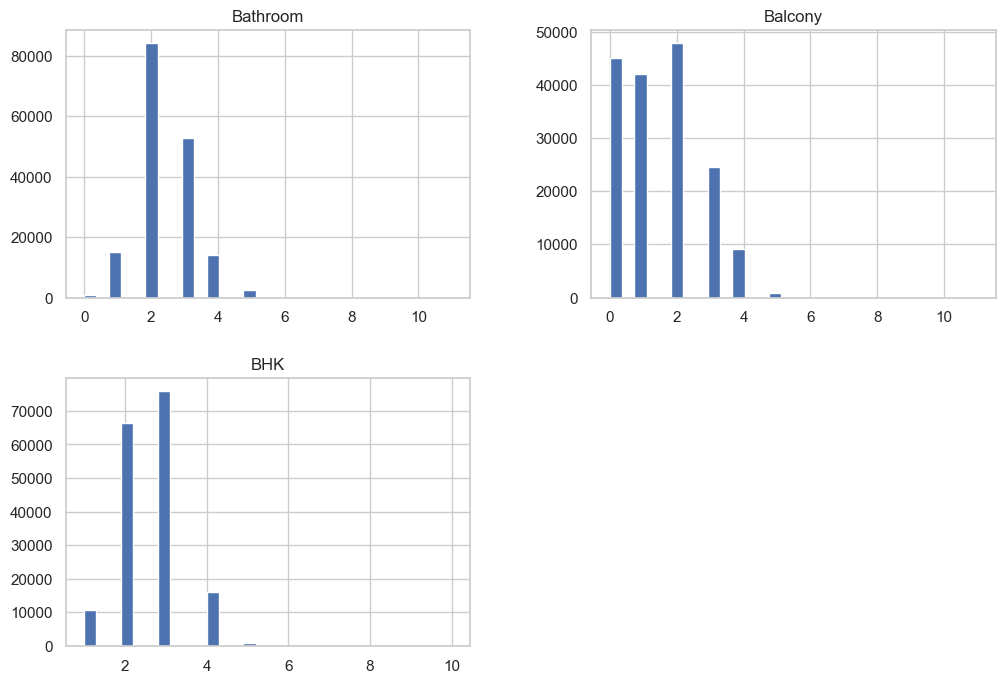

In [131]:
import matplotlib.pyplot as plt
num_cols = ['Bathroom', 'Balcony', 'BHK']
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.show()

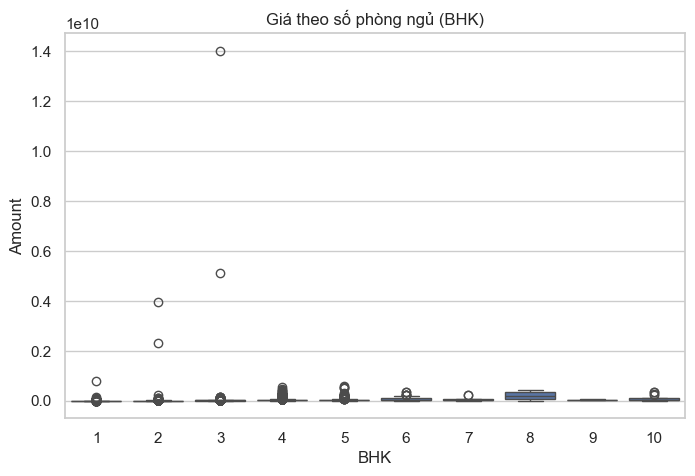

In [132]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='BHK', y='Amount')
plt.title("Giá theo số phòng ngủ (BHK)")
plt.show()

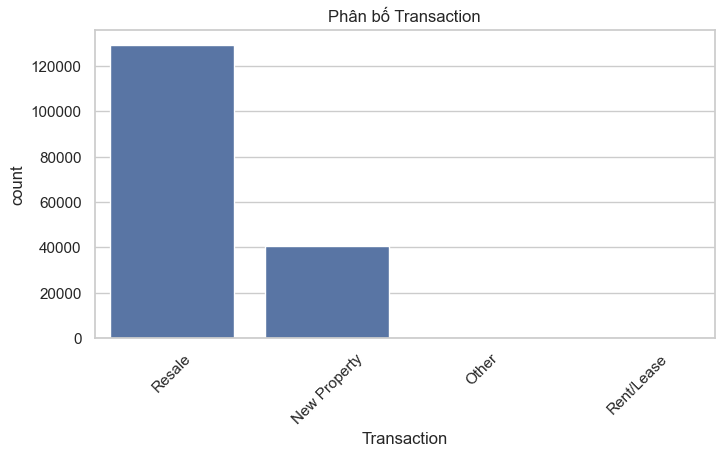

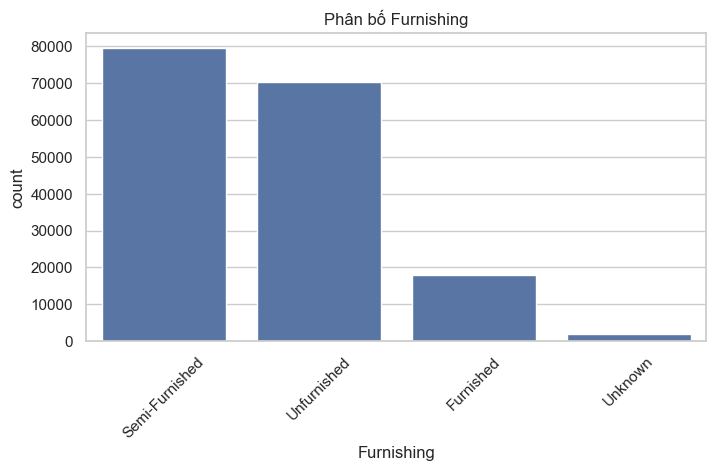

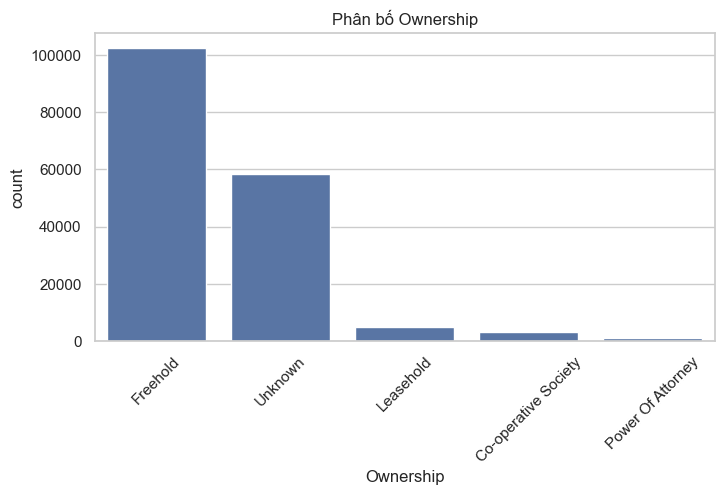

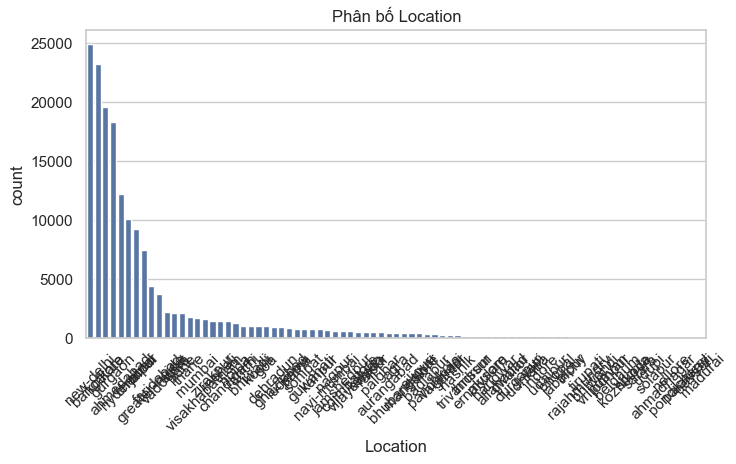

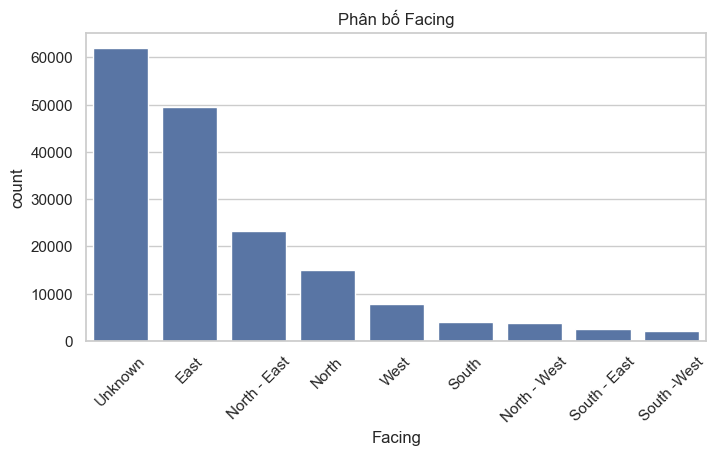

In [133]:
cat_cols = ['Transaction', 'Furnishing', 'Ownership', 'Location', 'Facing']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Phân bố {col}")
    plt.show()

In [134]:
cols_to_check = ['Amount', 'Carpet Area']

df_clean = df.copy()
for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[
        (df_clean[col] >= Q1 - 1.5 * IQR) &
        (df_clean[col] <= Q3 + 1.5 * IQR)
    ]


In [135]:
df.shape

(169860, 19)

In [136]:
df_clean = df.dropna(subset=['Carpet Area']).copy()

if 'Super Area' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Super Area','Status'])
df_clean = df_clean[df_clean['Carpet Area'] != 0]
print(f"Số lượng ban đầu: {len(df)}, sau khi làm sạch: {len(df_clean)}")

Số lượng ban đầu: 169860, sau khi làm sạch: 93620


In [137]:
df_clean.head()

,Index,Title,Description,Carpet Area,Transaction,Furnishing,Bathroom,Balcony,Car Parking,Ownership,BHK,Current Floor,Total Floors,Amount,Price,Location,Facing
0,0,Ready to Occupy Flat for sale in Srushti Siddh...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",500.0,Resale,Unfurnished,1,2,0,Unknown,1,10,11,4200000.0,6000.0,thane,Unknown
1,1,Ready to Occupy Flat for sale in Dosti Vihar P...,One can find this stunning 2 BHK flat for sale...,473.0,Resale,Semi-Furnished,2,0,1,Freehold,2,3,22,9800000.0,13799.0,thane,East
2,2,Ready to Occupy Flat for sale in Sunrise by Ka...,Up for immediate sale is a 2 BHK apartment in ...,779.0,Resale,Unfurnished,2,0,1,Freehold,2,10,29,14000000.0,17500.0,thane,East
3,4,Ready to Occupy Flat for sale in TenX Habitat ...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",635.0,Resale,Unfurnished,2,0,1,Co-operative Society,2,20,42,16000000.0,18824.0,thane,West
5,6,Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,550.0,Resale,Unfurnished,1,0,0,Unknown,1,4,5,1650000.0,2538.0,thane,Unknown


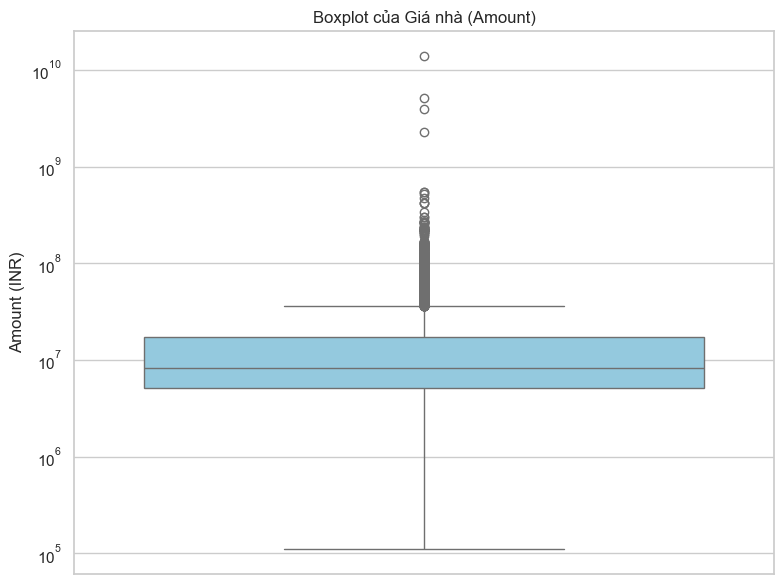

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean['Amount'], color='skyblue')
plt.title('Boxplot của Giá nhà (Amount)')
plt.ylabel('Amount (INR)')
plt.yscale('log') 
plt.tight_layout()
plt.show()

In [139]:
q1 = df_clean['Amount'].quantile(0.25)
q3 = df_clean['Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean = df_clean[(df_clean['Amount'] >= lower_bound) & (df_clean['Amount'] <= upper_bound)]

In [140]:
df_clean.to_csv('data/cleaned_house_prices.csv', index=False)


In [141]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

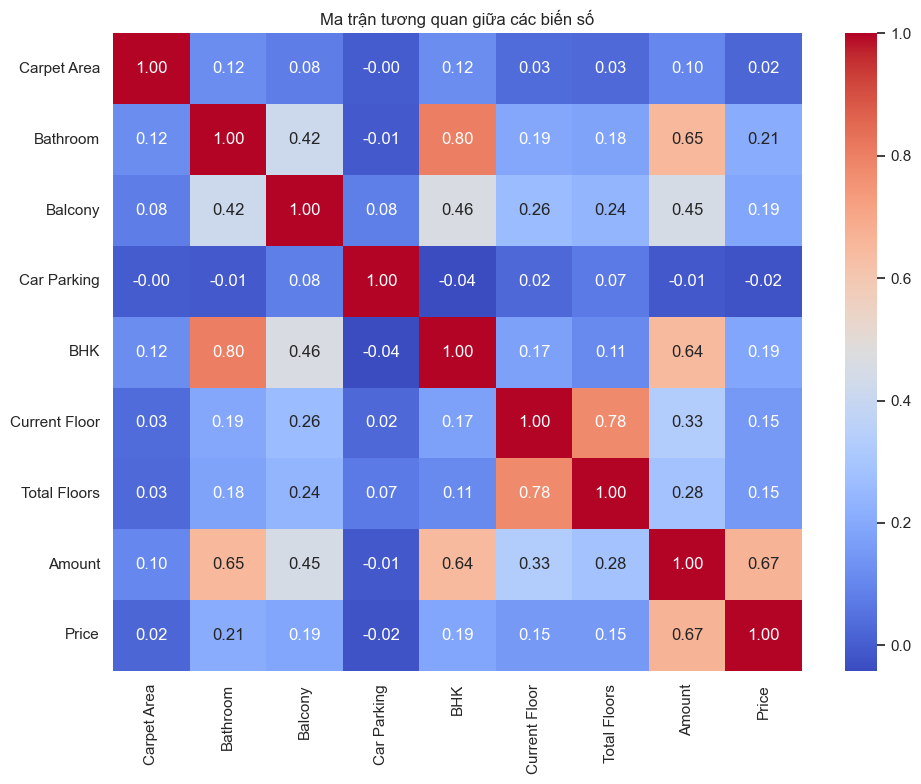

In [142]:
num_cols = ['Carpet Area', 'Bathroom', 'Balcony', 'Car Parking', 'BHK', 'Current Floor', 'Total Floors', 'Amount', 'Price']
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các biến số")
plt.tight_layout()
plt.show()

C:\Users\MY LAP\AppData\Local\Temp\ipykernel_4680\1920562270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BHK', y='Amount', data=df_clean, palette='Set2')


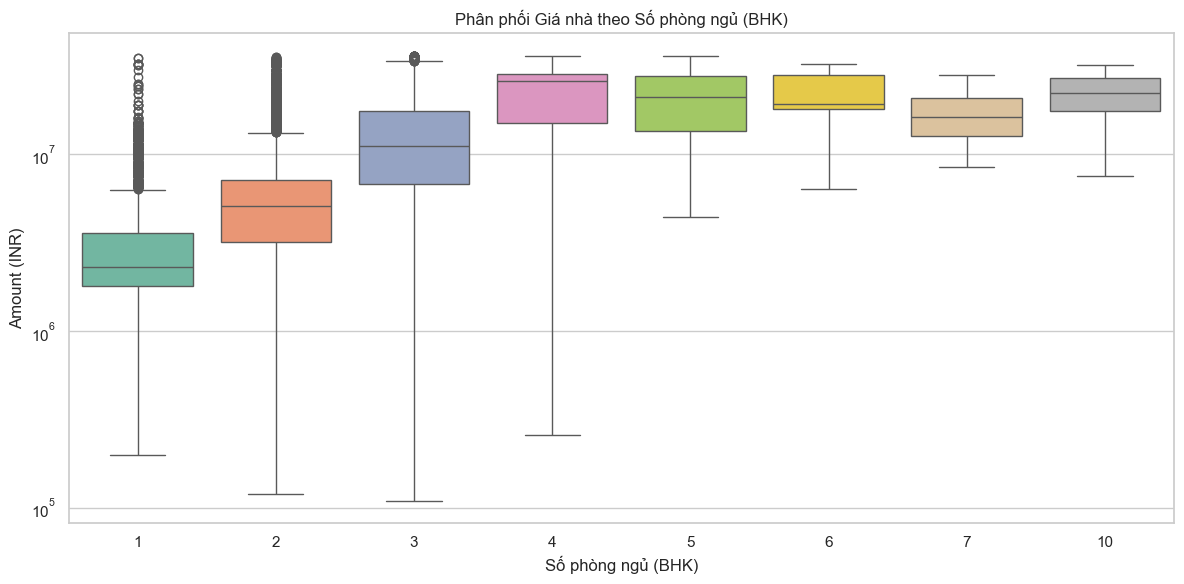

In [143]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='BHK', y='Amount', data=df_clean, palette='Set2')
plt.title('Phân phối Giá nhà theo Số phòng ngủ (BHK)')
plt.xlabel('Số phòng ngủ (BHK)')
plt.ylabel('Amount (INR)')
plt.yscale('log')
plt.tight_layout()
plt.show()

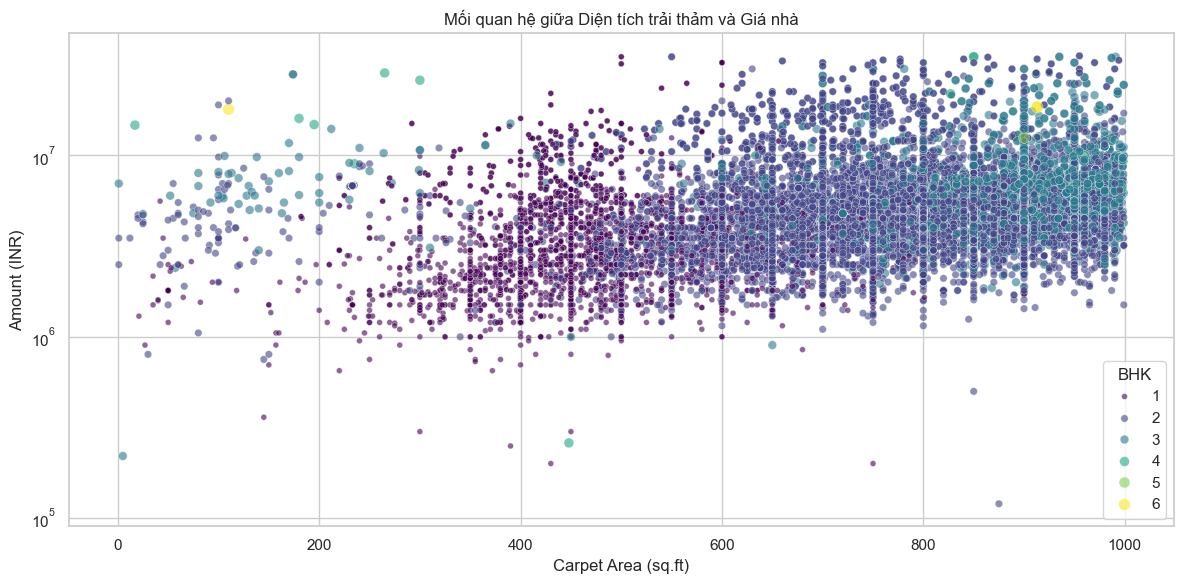

In [145]:
df_clean = df_clean[df_clean['Carpet Area'] <1000]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Carpet Area', y='Amount', hue='BHK', size='BHK', data=df_clean, palette='viridis', alpha=0.6)
plt.title('Mối quan hệ giữa Diện tích trải thảm và Giá nhà')
plt.xlabel('Carpet Area (sq.ft)')
plt.ylabel('Amount (INR)')
plt.yscale('log')
plt.tight_layout()
plt.show()